# Problem 1

Recall that for the original GAN, the discriminator $f_\phi(x)$ is trained with the following optimization:

$$\max_\phi p(x) \log [f_\phi(x)] + q_\theta(x) \log [1 - f_\phi(x)]$$

where $p(x)$ is the true data distribution, $q_\theta(x)$ is the generator's learned distribution, and $f_\phi(x) \in [0, 1]$.

1. Assuming $q_\theta(x)$ is fixed, what is the solution to this optimization problem? "Solution" here means the function $f_\phi(x)$ that maximizes the above objective. Your expression should be in terms of $p(x)$ and $q_\theta(x)$.
1. Assume that $q_\theta(x) = p(x)$, i.e. the generator has learned to fit the data distribution perfectly. What is the optimal discriminator in this case?

**Solution 1.1**

Let denote the objective as $L(f_\phi(x))$. 
To find the $f_\phi(x)$ that maximizes the $L(f_\phi(x))$, we can compute the derivate of the $L(f_\phi(x))$ with respect to $f_\phi(x)$ and set it to 0. Then solve for $f_\phi(x)$.


The derivate of the $L(f_\phi(x))$ with respect to $f_\phi(x)$ is:
$$
\frac{dL(f_\phi(x))}{df_\phi(x)} = \frac{p(x)}{f_\phi(x)} - \frac{q_\theta(x)}{1 - f_\phi(x)}
$$

To find the maximum, set it to 0:
$$
\frac{p(x)}{f_\phi(x)} - \frac{q_\theta(x)}{1 - f_\phi(x)} = 0
$$

So we have:

$$
f_\phi(x) = \frac{p(x)}{p(x) + q_\theta(x)}
$$

**Solution 1.2**

If $q_\theta(x) = p(x)$, the optimal discriminator becomes

$$
f_\phi(x) = \frac{p(x)}{p(x) + q_\theta(x)} = \frac{p(x)}{p(x) + p(x)} = \frac{1}{2}
$$

So when the generator has learned to fit the data distribution perfectly, the optimal discriminator assigns a probability of $\frac{1}{2}$ to both the true data and the generated data, meaning it cannot distinguish between real and generated samples.

# Problem 2

Consider the following min-max optimization problem: $\min_x \max_y xy$.

1. Is there a stationary point to the function $xy$ (i.e. a point where $\frac{\partial xy}{\partial x} = 0$ and $\frac{\partial xy}{\partial y} = 0$)? If so, what is it?

1. Consider tackling this optimization problem with alternating gradient descent (i.e. alternatingly minimizing with respect to $x$ and maximizing with respect to $y$ using gradient descent). Assume that the learning rate is the same for both steps and that optimization begins from the point $x = 1, y = 1$. Will optimization reach a stationary point? Feel free to support your answer theoretically and/or empirically (i.e. by implementing it in code).


**Solution 2.1**

For the function $xy$, we have:

$$
\frac{\partial xy}{\partial x} = y
$$

$$
\frac{\partial xy}{\partial y} = x
$$

For the stationary point where $\frac{\partial xy}{\partial x} = 0$ and $\frac{\partial xy}{\partial y} = 0$, we can get $x = 0$ and $y = 0$.

Therefore, there is a stationary point at $(x, y) = (0, 0)$.

**Solution 2.2**

In this case, the optimization will not reach a stationary point(i.e. $(x, y) = (0, 0)$). The following code will support my answer:

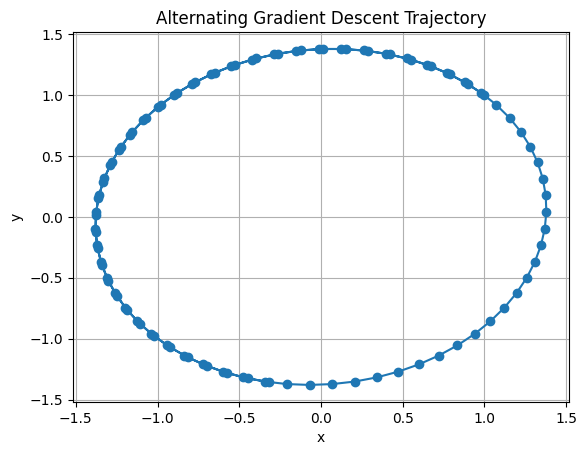

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x * y

def df_dx(x, y):
    return y

def df_dy(x, y):
    return x

def alternating_gradient_descent(x0, y0, alpha, num_iterations):
    x, y = x0, y0
    trajectory = [(x, y)]

    for _ in range(num_iterations):
        x = x - alpha * df_dx(x, y)
        y = y + alpha * df_dy(x, y)
        trajectory.append((x, y))

    return trajectory

# Parameters
x0, y0 = 1, 1
alpha = 0.1
num_iterations = 100

# Run alternating gradient descent
trajectory = alternating_gradient_descent(x0, y0, alpha, num_iterations)

# Plot the trajectory
x_values, y_values = zip(*trajectory)
plt.plot(x_values, y_values, marker="o")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Alternating Gradient Descent Trajectory")
plt.grid()
plt.show()


- As we can see, the optimization will not reach a stationary point(i.e. $(x, y) = (0, 0)$).



# Problem 3

The code below is taken from [the example in the textbook](http://d2l.ai/chapter_generative-adversarial-networks/gan.html). I've modified the example so that the true data distribution is a mixture of two Gaussians rather than a single Gaussian. Feel free to use the Pytorch code in this problem instead, but make sure you keep my modification to the data distribution.

The code below uses the original GAN loss. A somewhat popular alternative loss function is the ["Least-Squares GAN (LS-GAN)"](https://arxiv.org/pdf/1611.04076.pdf), which is defined as follows:

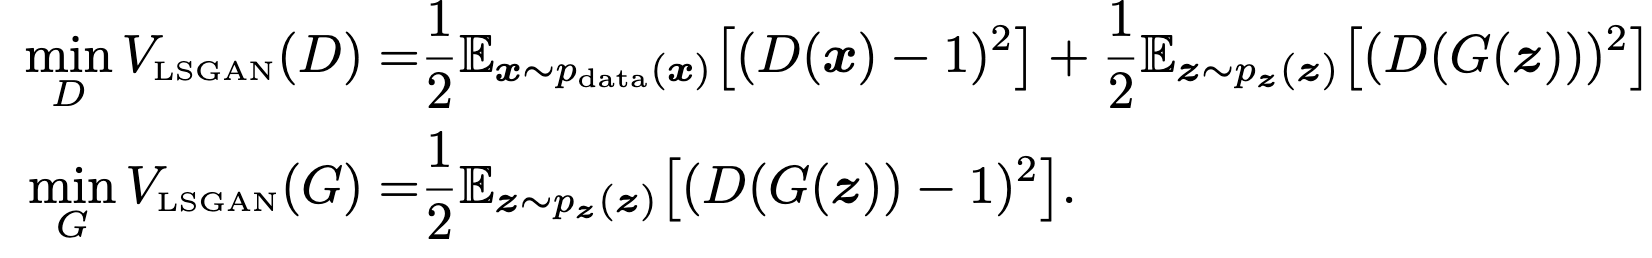

Modify the code so that it uses the LS-GAN objective instead of the original GAN objective. Does it converge to a different solution?

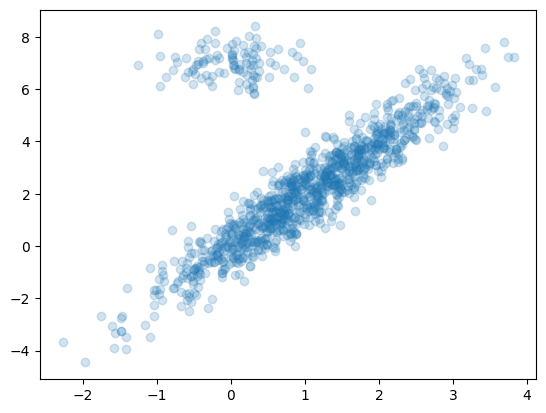

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from torch import nn

# Do not change this part! It is different from the example in the textbook.
X = np.random.normal(0.0, 1, (1000, 2))
A = np.array([[1, 2], [-0.1, 0.5]])
b = np.array([1, 2])
data = np.concatenate([np.dot(X, A) + b, np.random.normal(0.0, 0.5, (100, 2)) + np.array([0, 7])], 0)
np.random.shuffle(data)
data = torch.tensor(data, dtype=torch.float32)
plt.scatter(data[:, 0].numpy(), data[:, 1].numpy(), alpha=0.2)

### Original GAN

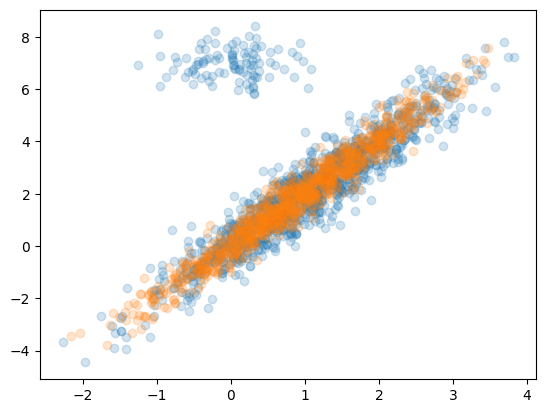

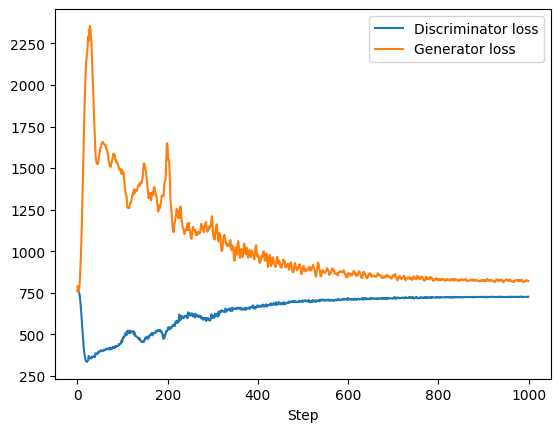

In [3]:
net_G = nn.Sequential(nn.Linear(2, 2))

net_D = nn.Sequential(
    nn.Linear(2, 5), nn.Tanh(),
    nn.Linear(5, 3), nn.Tanh(),
    nn.Linear(3, 1))

def update_D(X, Z, net_D, net_G, loss, trainer_D):
    """Update discriminator."""
    batch_size = X.shape[0]
    ones = torch.ones((batch_size,), device=X.device)
    zeros = torch.zeros((batch_size,), device=X.device)
    trainer_D.zero_grad()
    real_Y = net_D(X)
    fake_X = net_G(Z)
    # Do not need to compute gradient for `net_G`, detach it from
    # computing gradients.
    fake_Y = net_D(fake_X.detach())
    loss_D = (loss(real_Y, ones.reshape(real_Y.shape)) +
              loss(fake_Y, zeros.reshape(fake_Y.shape))) / 2
    loss_D.backward()
    trainer_D.step()
    return loss_D

def update_G(Z, net_D, net_G, loss, trainer_G):
    """Update generator."""
    batch_size = Z.shape[0]
    ones = torch.ones((batch_size,), device=Z.device)
    trainer_G.zero_grad()
    # We could reuse `fake_X` from `update_D` to save computation
    fake_X = net_G(Z)
    # Recomputing `fake_Y` is needed since `net_D` is changed
    fake_Y = net_D(fake_X)
    loss_G = loss(fake_Y, ones.reshape(fake_Y.shape))
    loss_G.backward()
    trainer_G.step()
    return loss_G

def train(net_D, net_G, num_steps, lr_D, lr_G, latent_dim, data):
    loss = nn.BCEWithLogitsLoss(reduction='sum')
    for w in net_D.parameters():
        nn.init.normal_(w, 0, 0.02)
    for w in net_G.parameters():
        nn.init.normal_(w, 0, 0.02)
    trainer_D = torch.optim.Adam(net_D.parameters(), lr=lr_D)
    trainer_G = torch.optim.Adam(net_G.parameters(), lr=lr_G)
    losses_D, losses_G = [], []
    for epoch in range(num_steps):
        batch_size = data.shape[0]
        Z = torch.normal(0, 1, size=(batch_size, latent_dim))
        losses_D.append(update_D(data, Z, net_D, net_G, loss, trainer_D).detach().numpy())
        losses_G.append(update_G(Z, net_D, net_G, loss, trainer_G).detach().numpy())
    # Visualize generated examples
    Z = torch.normal(0, 1, size=(1000, latent_dim))
    fake_X = net_G(Z).detach().numpy()
    plt.figure()
    plt.scatter(data.detach().numpy()[:, 0], data.detach().numpy()[:, 1], alpha=0.2)
    plt.scatter(fake_X[:, 0], fake_X[:, 1], alpha=0.2)
    plt.figure()
    plt.plot(losses_D, label="Discriminator loss")
    plt.plot(losses_G, label="Generator loss")
    plt.legend()
    plt.xlabel("Step")

lr_D, lr_G, latent_dim, num_epochs = 0.05, 0.005, 2, 1000
train(net_D, net_G, num_epochs, lr_D, lr_G, latent_dim, data)

### LS GAN

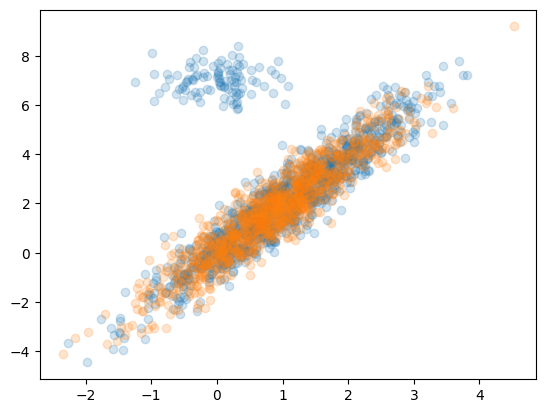

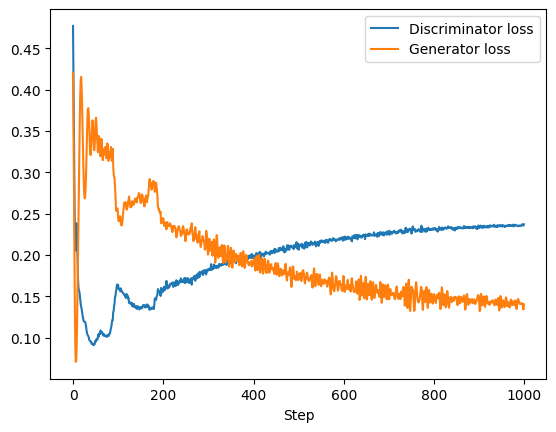

In [4]:
net_G = nn.Sequential(nn.Linear(2, 2))

net_D = nn.Sequential(
    nn.Linear(2, 5), nn.Tanh(),
    nn.Linear(5, 3), nn.Tanh(),
    nn.Linear(3, 1))


def update_D(X, Z, net_D, net_G, trainer_D):
    """Update discriminator."""
    batch_size = X.shape[0]
    ones = torch.ones((batch_size,), device=X.device)
    zeros = torch.zeros((batch_size,), device=X.device)
    trainer_D.zero_grad()
    real_Y = net_D(X)
    fake_X = net_G(Z)
    # Do not need to compute gradient for `net_G`, detach it from
    # computing gradients.
    fake_Y = net_D(fake_X.detach())

    # LS-GAN loss for discriminator
    loss_D = 0.5 * (torch.mean((real_Y - ones)**2) + torch.mean(fake_Y**2))

    loss_D.backward()
    trainer_D.step()
    return loss_D

def update_G(Z, net_D, net_G, trainer_G):
    """Update generator."""
    batch_size = Z.shape[0]
    ones = torch.ones((batch_size,), device=Z.device)
    trainer_G.zero_grad()
    # We could reuse `fake_X` from `update_D` to save computation
    fake_X = net_G(Z)
    # Recomputing `fake_Y` is needed since `net_D` is changed
    fake_Y = net_D(fake_X)

    #LS-GAN loss for generator
    loss_G = 0.5 * torch.mean((fake_Y - ones)**2)

    loss_G.backward()
    trainer_G.step()
    return loss_G

def train(net_D, net_G, num_steps, lr_D, lr_G, latent_dim, data):
    for w in net_D.parameters():
        nn.init.normal_(w, 0, 0.02)
    for w in net_G.parameters():
        nn.init.normal_(w, 0, 0.02)
    trainer_D = torch.optim.Adam(net_D.parameters(), lr=lr_D)
    trainer_G = torch.optim.Adam(net_G.parameters(), lr=lr_G)
    losses_D, losses_G = [], []
    for epoch in range(num_steps):
        batch_size = data.shape[0]
        Z = torch.normal(0, 1, size=(batch_size, latent_dim))
        losses_D.append(update_D(data, Z, net_D, net_G, trainer_D).detach().numpy())
        losses_G.append(update_G(Z, net_D, net_G, trainer_G).detach().numpy())
    # Visualize generated examples
    Z = torch.normal(0, 1, size=(1000, latent_dim))
    fake_X = net_G(Z).detach().numpy()
    plt.figure()
    plt.scatter(data.detach().numpy()[:, 0], data.detach().numpy()[:, 1], alpha=0.2)
    plt.scatter(fake_X[:, 0], fake_X[:, 1], alpha=0.2)
    plt.figure()
    plt.plot(losses_D, label="Discriminator loss")
    plt.plot(losses_G, label="Generator loss")
    plt.legend()
    plt.xlabel("Step")

lr_D, lr_G, latent_dim, num_epochs = 0.05, 0.005, 2, 1000
train(net_D, net_G, num_epochs, lr_D, lr_G, latent_dim, data)


As we can see, the solutions of the original GAN and LS-GAN are somewhat different. The LS-GAN loss function changes the dynamics of the training process, and thus, it may lead to a different equilibrium between the generator and the discriminator.

In theory, the LS-GAN loss function is designed to mitigate some common issues with the original GAN training, such as mode collapse and vanishing gradients. It encourages the generator to generate more diverse samples while providing more stable and smooth gradients for both the generator and the discriminator during training.
